# plot maps of temerapture change

In [1]:
%matplotlib inline
from config_calc import *

import matplotlib
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'

import cmocean
import colorbrewer
import plot_tools
import proc_cesm_le

### read the CESM-LE data

In [2]:
%%time
tr85 = proc_cesm_le.open_ens('tr85','ann_dft_tanm',['TEMP'],isel={'time':-1,'z_t':0})
baseline = proc_cesm_le.open_ens('tr85','ann_dft_tavg_1920-1939',['TEMP'],isel={'z_t':0})
print tr85
print baseline

<xarray.Dataset>
Dimensions:   (ens: 33, nlat: 384, nlon: 320, z_t_150m: 15, z_w: 60)
Coordinates:
    z_t       float64 500.0
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: ens, nlat, nlon
Data variables:
    TEMP      (ens, nlat, nlon) float32 nan nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 

In [3]:
%%time
tr85a = tr85.mean(dim='ens')
baseline = baseline.mean(dim='ens')
print tr85a

<xarray.Dataset>
Dimensions:   (nlat: 384, nlon: 320, z_t_150m: 15, z_w: 60)
Coordinates:
  * z_t_150m  (z_t_150m) float32 500.0 1500.0 2500.0 3500.0 4500.0 5500.0 ...
  * z_w       (z_w) float32 0.0 1000.0 2000.0 3000.0 4000.0 5000.0 6000.0 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP      (nlat, nlon) float32 nan nan nan nan nan nan nan nan nan nan ...
    year      float64 170.5
    KMT       (nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    TAREA     (nlat, nlon) float64 1.125e+13 1.125e+13 1.124e+13 1.124e+13 ...
    TLAT      (nlat, nlon) float64 -79.22 -79.22 -79.22 -79.22 -79.22 -79.22 ...
    TLONG     (nlat, nlon) float64 320.6 321.7 322.8 323.9 325.1 326.2 327.3 ...
    UAREA     (nlat, nlon) float64 1.423e+13 1.423e+13 1.423e+13 1.423e+13 ...
    ULAT      (nlat, nlon) float64 -78.95 -78.95 -78.95 -78.95 -78.95 -78.95 ...
    ULONG     (nlat, nlon) float64 321.1 322.3 323.4 324.5 325.6 326.8 327.9 ...
    dz        float64 1e+03

/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [4]:
%%time
tr85a = tr85a.compute()
baseline = baseline.compute()

CPU times: user 674 ms, sys: 552 ms, total: 1.23 s
Wall time: 4.7 s


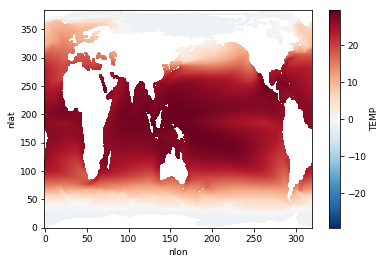

In [5]:
baseline.TEMP.plot()

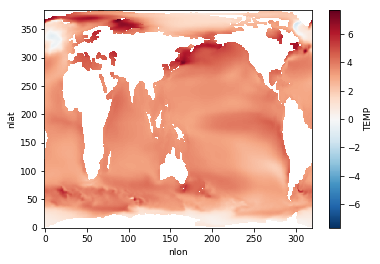

In [6]:
tr85a.TEMP.plot()

In [7]:
Z = [[]]*2
lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = baseline.TEMP.values
lon,lat,Z[0]= plot_tools.adjust_pop_grid(lon,lat,field)

lon = tr85.TLONG.values
lat = tr85.TLAT.values
field = tr85a.TEMP.values
lon,lat,Z[1]= plot_tools.adjust_pop_grid(lon,lat,field)

for z in Z:
    print z.shape
print lon.shape
print lat.shape

(384, 321)
(384, 321)
(384, 321)
(384, 321)


/glade/p/work/mclong/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


initial plot size (display units): 6.98,3.54
Adjusting fig size:
	(W,H in): 10.00,4.00 --> 8.03,6.73
new plot size: 5.61,3.57


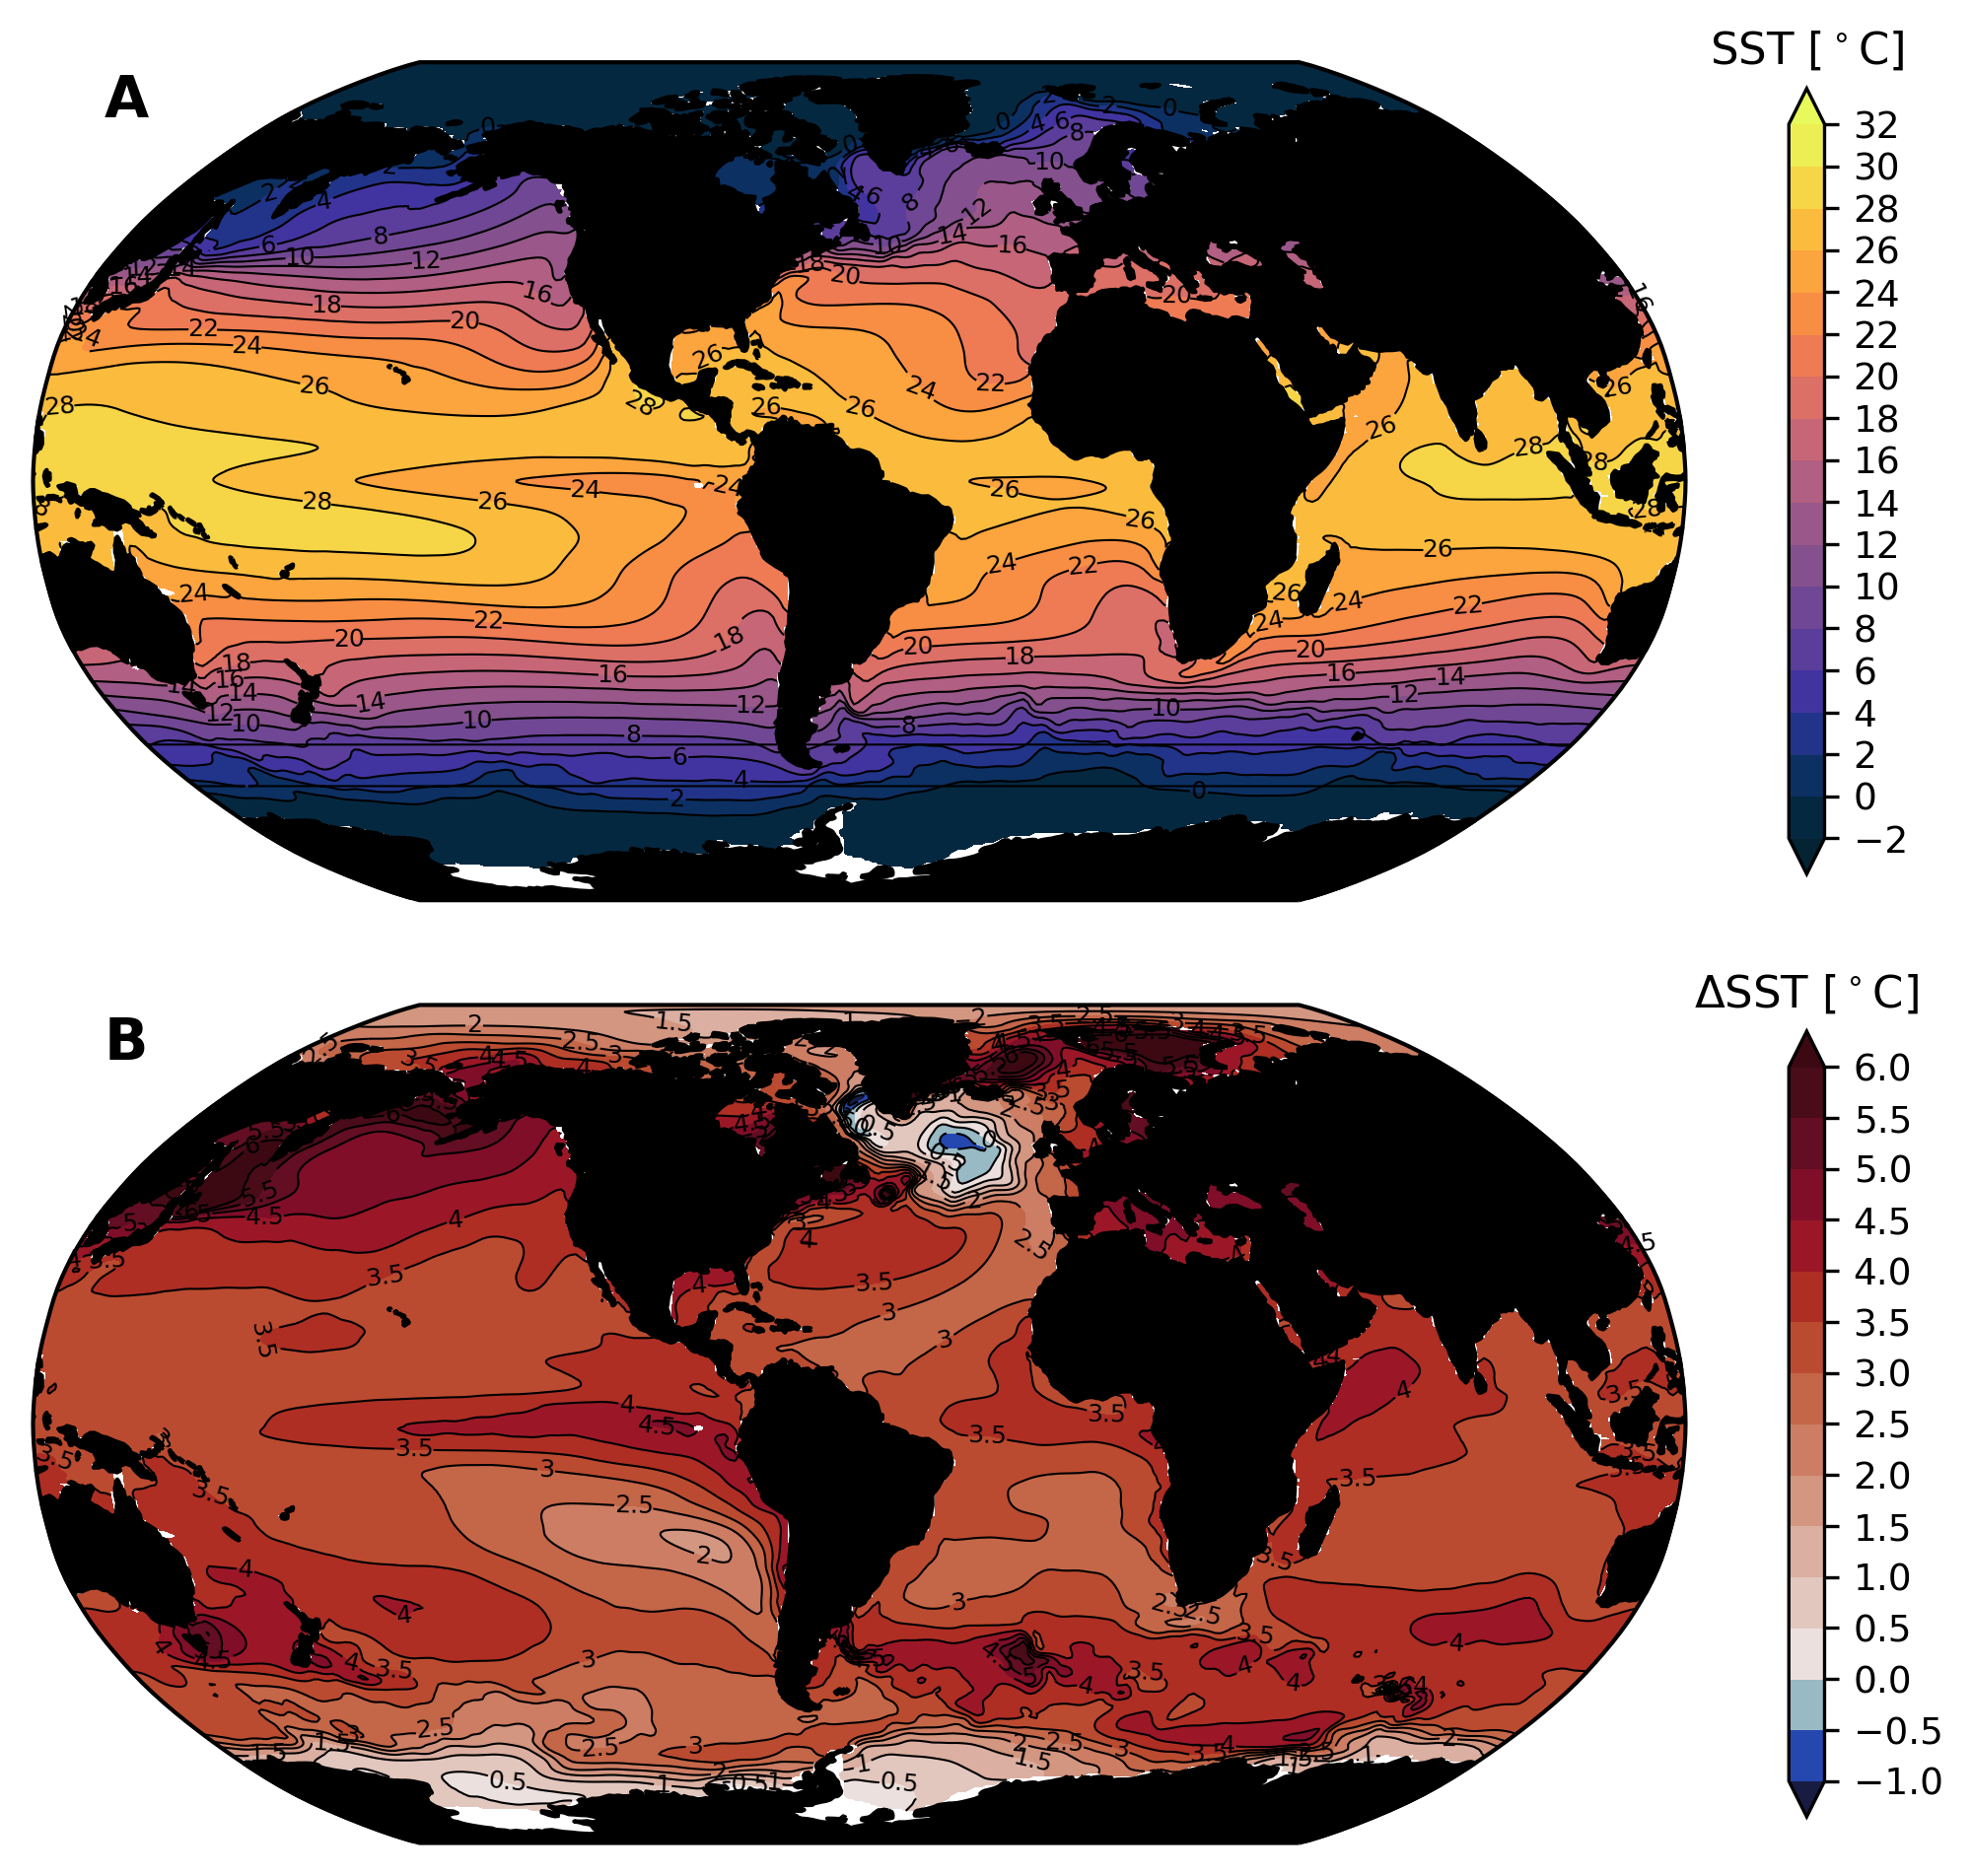

In [8]:
plot_name = os.path.join(diro['fig'],'cesm-sst.pdf')

matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'

fig=plt.figure(figsize=(10, 4),dpi=300)
gs = gridspec.GridSpec(2,1)


obj = [[]]*2
ax = []
for i,z in enumerate(Z):
    if i == 0:
        levels = np.arange(-2.,34.,2.)
        units = 'SST [$^\circ$C]'
        contour_specs = {'levels':levels,'cmap':cmocean.cm.thermal ,'extend':'both'}#,'norm':norm}
    else:
        levels = np.arange(-1.,6.5,0.5)
        norm = plot_tools.MidPointNorm(midpoint=0)
        units = '$\Delta$SST [$^\circ$C]'
        contour_specs = {'levels':levels,'cmap':cmocean.cm.balance,'norm':norm,'extend':'both'}
          
    obj[i] = plot_tools.canvas_map_contour_overlay(lon,lat,z,
                                                   contour_specs,
                                                   units = units,
                                                   fig=fig,
                                                   gridspec=gs,
                                                   row=i,col=0)
    ax.append(obj[i]['ax'])

gridspec_kwargs = {'hspace' : -0.1,
                   'wspace' : 0.05,
                   'left' : 0.,
                   'right' : 0.87,
                   'bottom' : 0.,
                   'top' : 1.}
fgsz = plot_tools.plotgrid(fig, gs, ax, [2,1],gridspec_kwargs)

alp = [chr(i).upper() for i in range(97,97+26)]
for i,axi in enumerate(ax):
    p = axi.get_position()
    y = p.y1-0.08
    fig.text(0.03,y,'%s'%alp[i],
             fontsize=14.,
             fontweight = 'semibold')
plt.savefig(plot_name,dpi=300,bbox_inches='tight')